# Repaso funciones y gráficos

### Tópico : COVID -19

En el siguiente link se encuentran los datos del Minsal con los Casos de Covid acumulados diarios por región en Chile:


https://github.com/MinCiencia/Datos-COVID19/raw/master/output/producto3/CasosTotalesCumulativo_T.csv


In [17]:
#Cargando Dataset y librerias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from operator import indexOf
from unidecode import unidecode #Libreria que trae la funcion unidecode (remueve tildes y acentos)
from datetime import datetime #para formateo de fechas y otros.


covid = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv')

#Eliminemos tildes de las columnas y dejemoslas en minuculas
for i in covid.columns.tolist():
    covid.rename(columns = {i:unidecode(i.lower())}, inplace=True)

covid.rename(columns = {'region':'fecha'}, inplace=True) # Cambiando de "nombre" a la columna region por "fecha"
covid.drop('total',axis=1,inplace=True) # dropeamos columna total (la obtendremos mas adelante)
display(covid)

,fecha,arica y parinacota,tarapaca,antofagasta,atacama,coquimbo,valparaiso,metropolitana,o'higgins,maule,nuble,biobio,araucania,los rios,los lagos,aysen,magallanes
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,2022-09-28,72364,102683,165361,101319,186743,429119,1749742,197406,309374,133949,452549,265314,131086,225533,31605,62105
940,2022-09-29,72393,102717,165457,101369,186877,429618,1751251,197608,309793,134111,453041,265529,131186,225624,31621,62140
941,2022-09-30,72431,102760,165574,101429,187030,429996,1752655,197836,310182,134301,453511,265760,131281,225717,31635,62167
942,2022-10-01,72459,102788,165661,101482,187158,430361,1754099,197983,310466,134458,453948,265970,131379,225824,31660,62185


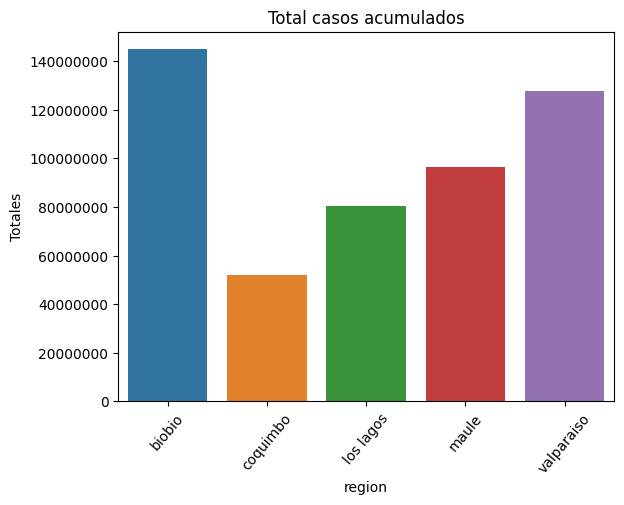

In [18]:
# Despivoteando la tabla
covid_unpivot = covid.melt(id_vars='fecha',var_name = 'region', value_name='Totales').reset_index(drop=True)

# Plot Total Casos en Regiones Metroplitana,Maule,Coquimbo,Los Lagos y Biobio
distribucion_totales = covid_unpivot.groupby('region').agg('sum').reset_index()
regiones_pedidas = ['metroplitana','maule','coquimbo','valparaiso','los lagos','biobio']


ax = plt.subplot()
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = 'region', y='Totales', data= distribucion_totales[distribucion_totales['region'].isin(regiones_pedidas)])
plt.xticks(rotation=50)
plt.title('Total casos acumulados')
plt.show()

In [20]:
# Calculamos diferencia diaria
covid_unpivot['casos_diarios'] =  covid_unpivot.groupby("region")["Totales"].diff()

In [21]:
# Definimos region como formato fecha
covid_unpivot['fecha'] = pd.to_datetime(covid_unpivot['fecha'], format = '%Y-%m-%d')
covid_unpivot.dtypes

fecha            datetime64[ns]
region                   object
Totales                   int64
casos_diarios           float64
dtype: object

C:\Users\chuck\AppData\Local\Temp\ipykernel_22968\1808068740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['fecha'] = data_filtrada['fecha'] = pd.to_datetime(data_filtrada['fecha'])


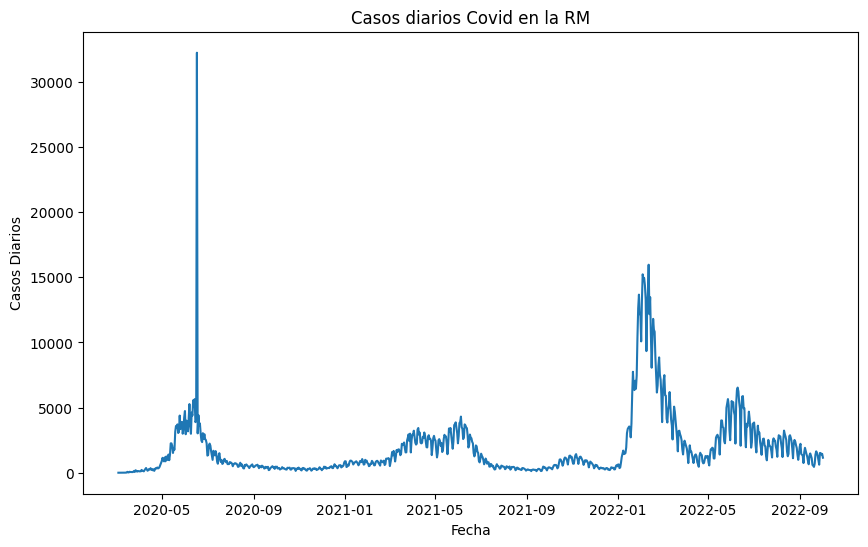

In [22]:
# Creando grafico
data_filtrada = covid_unpivot[(covid_unpivot['region'] == 'metropolitana')]
data_filtrada['fecha'] = data_filtrada['fecha'] = pd.to_datetime(data_filtrada['fecha'])

# Creando grafico

plt.figure(figsize = (10,6))
ax = plt.subplot()
sns.lineplot(x = 'fecha', y='casos_diarios', data= data_filtrada)
plt.title('Casos diarios Covid en la RM')
plt.xlabel('Fecha')
plt.ylabel('Casos Diarios')

plt.show()

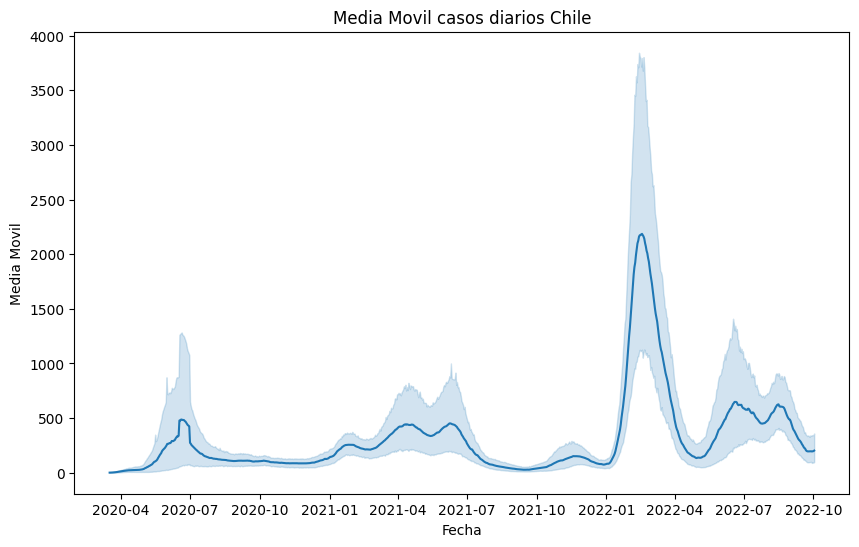

In [23]:
# Añadiendo media movil
covid_unpivot['media_movil'] = covid_unpivot['casos_diarios'].rolling(14).mean()
data_filtrada = covid_unpivot[covid_unpivot['media_movil'] >= 0]


# Graficando media movil de 14 dias

plt.figure(figsize = (10,6))
sns.lineplot(x = 'fecha', y='media_movil', data= data_filtrada)
plt.title('Media Movil casos diarios Chile')
plt.xlabel('Fecha')
plt.ylabel('Media Movil')
plt.show()

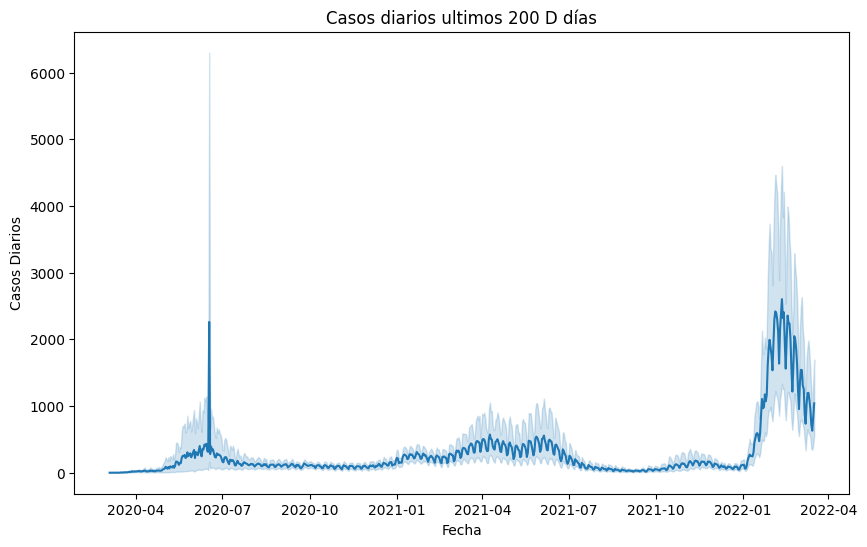

In [24]:
#Para que funcione tengo que usar mi fecha como datetime!!!

covid_unpivot['fecha'] = pd.to_datetime(covid_unpivot['fecha'])
ultimosXDias = '200 D'
data_filtrada2 = covid_unpivot[covid_unpivot['fecha'] <= (datetime.now() - pd.to_timedelta(ultimosXDias))]
data_filtrada2 = data_filtrada2[data_filtrada2['casos_diarios'] >= 0]

plt.figure(figsize = (10,6))
ax = plt.subplot()
sns.lineplot(x = 'fecha', y='casos_diarios', data= data_filtrada2)
plt.title(f'Casos diarios ultimos {ultimosXDias} días')
plt.xlabel('Fecha')
plt.ylabel('Casos Diarios')

plt.show()

In [25]:
# Creación de función que recibe ultimos dias a revisar y region a analizar

def plot_dia_region(dias,region):
    dias = str(dias) + ' D'
    region = str(region)
    titulo = str(dias) + 'ias'
    filtro1 = (data_filtrada['region'] == region) & (data_filtrada['fecha'] >= datetime.now() - pd.to_timedelta(dias)) & (data_filtrada['casos_diarios'] >= 0)
    data = data_filtrada[filtro1]
    plt.figure(figsize=(10,6))
    ax = plt.subplot()
    sns.lineplot(x = 'fecha', y='casos_diarios', data= data)
    plt.title(f'Casos diarios ultimos {titulo} en {region.capitalize()}')

    plt.show()

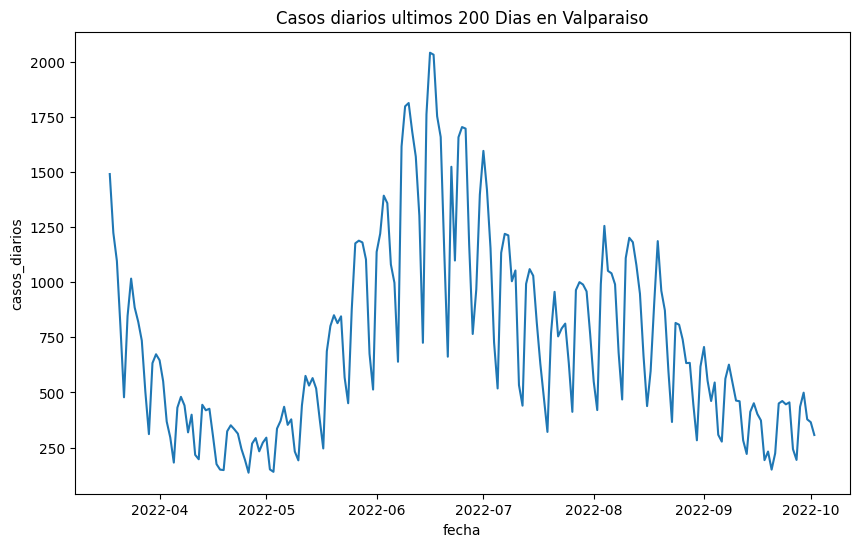

In [26]:
# Probando la funcion

plot_dia_region(200,'valparaiso')